In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
california_houses = datasets.fetch_california_housing()

In [3]:
california_houses

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
print(california_houses.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [5]:
df_calif_houses = pd.DataFrame(california_houses['data']).rename(columns={0: 'MedInc', 1: 'HouseAge', 2: 'AveRooms', 3: 'AveBedrms',
                                                        4: 'Population', 5: 'AveOccup', 6: 'Latitude', 7: 'Longitude'})
df_calif_houses['MedHouseVal'] = california_houses['target']
df_calif_houses.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df_calif_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Пропусков нет

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [178]:
df_calif_houses.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [179]:
df_calif_houses.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [180]:
X = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses['MedHouseVal']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [182]:
y_pred = model.predict(X_test)

In [183]:
RMSE_1 = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE_1)

0.7455813830127762


In [184]:
R2_1 = r2_score(y_test, y_pred)
print(R2_1)

0.575787706032451


In [15]:
import seaborn as sns

<AxesSubplot:xlabel='MedHouseVal'>

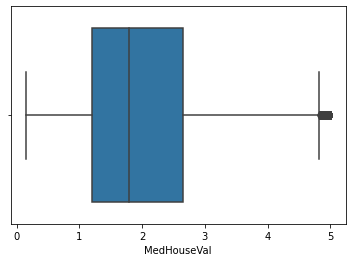

In [185]:
sns.boxplot(x='MedHouseVal', data=df_calif_houses)

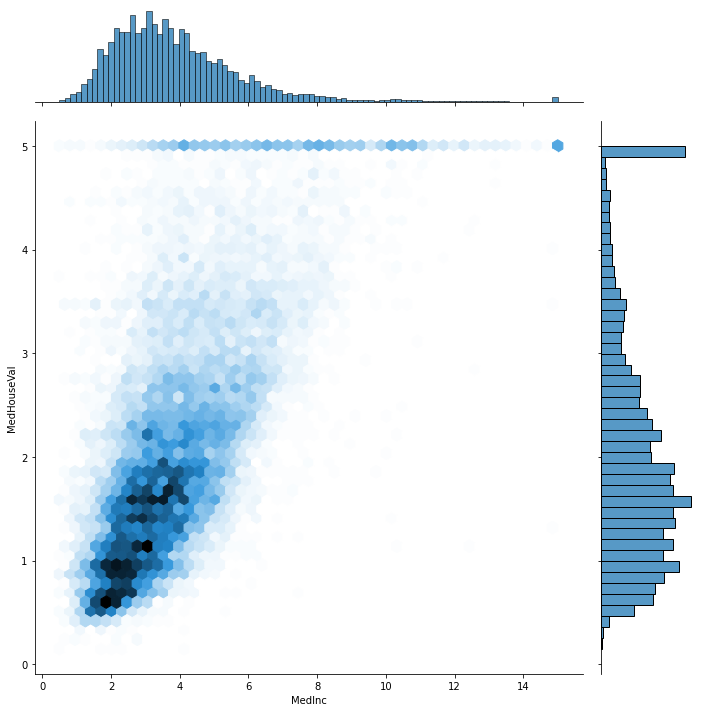

In [186]:
sns.jointplot(x='MedInc', y='MedHouseVal', data=df_calif_houses, kind='hex', height=10)

In [187]:
df_calif_houses[df_calif_houses.MedHouseVal >= 5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001
459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001
493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001
494,9.3959,52.0,7.512097,0.955645,1366.0,2.754032,37.85,-122.24,5.00001
509,7.8772,52.0,8.282548,1.049861,947.0,2.623269,37.83,-122.23,5.00001
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001
20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001
20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001
20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001


In [188]:
df_calif_houses['MedHouseVal'].value_counts()

5.00001    965
1.37500    122
1.62500    117
1.12500    103
1.87500     93
          ... 
4.50800      1
0.32900      1
3.10100      1
3.26300      1
2.70400      1
Name: MedHouseVal, Length: 3842, dtype: int64

У целевой переменной есть выбросы в верхней границе. По какой то причине выброс со значением 5.00001 неественно много раз повторяется(на графике рассапределения вверху длинная и довольно плотная линия. Может ошибка в данных?). Из-за этого медиана смещается. Остальные выбросы, это районы с дорогой недвижимостью, что видно на гистограме, у которой длинный хвост в сторону роста стоимости.

In [189]:
df_calif_houses['MedHouseVal'][df_calif_houses.MedHouseVal <= 5].describe()

count    19675.000000
mean         1.924779
std          0.977115
min          0.149990
25%          1.166000
50%          1.738000
75%          2.482000
max          5.000000
Name: MedHouseVal, dtype: float64

In [190]:
import matplotlib.pyplot as plt

<AxesSubplot:>

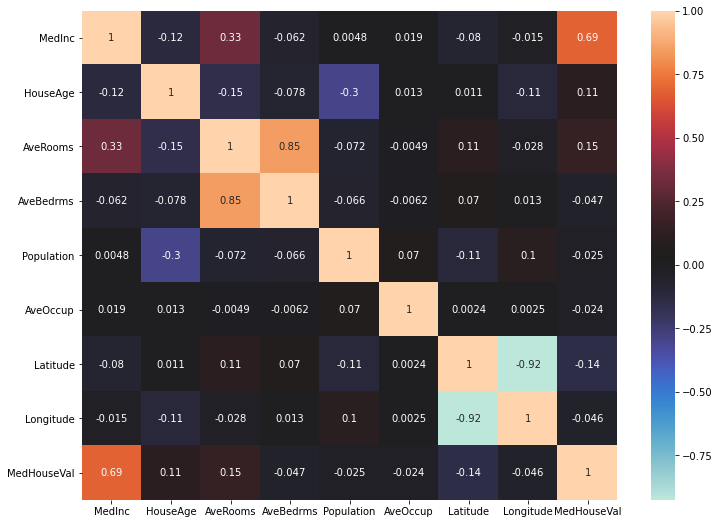

In [191]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_calif_houses.corr(), annot=True, cmap='icefire')

Относительно целевой переменной, то она сильно положительно коррелирует с MedInc. С другими признаками корреляция особо не наблюдается. Есть слабая отрицательная корреляция между возрастом домов и населением района. Очень сильная корреляция между средним числом комнат и числом спален. Очевидно, что эти 2 признака линейно зависимы, и для модели стоит взять один из них(например число комнат). Широта и долгота некоррелируют с другими признаками и целевой переменной, а сравнивать между собой их несовсем корректно. Впринципе их можно не включать в модель.

In [192]:
X = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [193]:
y_pred = model.predict(X_test)

In [194]:
RMSE_2 = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE_2)

0.7398151789804084


In [195]:
R2_2 = r2_score(y_test, y_pred)
print(R2_2)

0.5823239094526445


Все таки широту и долготу не стоит удалять, так как без них модель становится несколько хуже. Что касается числа спален, то удаление этого признака улчшило показатели модели, но ненамного.

In [196]:
df_calif_houses_new = df_calif_houses[['MedInc', 'HouseAge', 'AveRooms', 'Population',
                                       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']]
df_calif_houses_new.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422


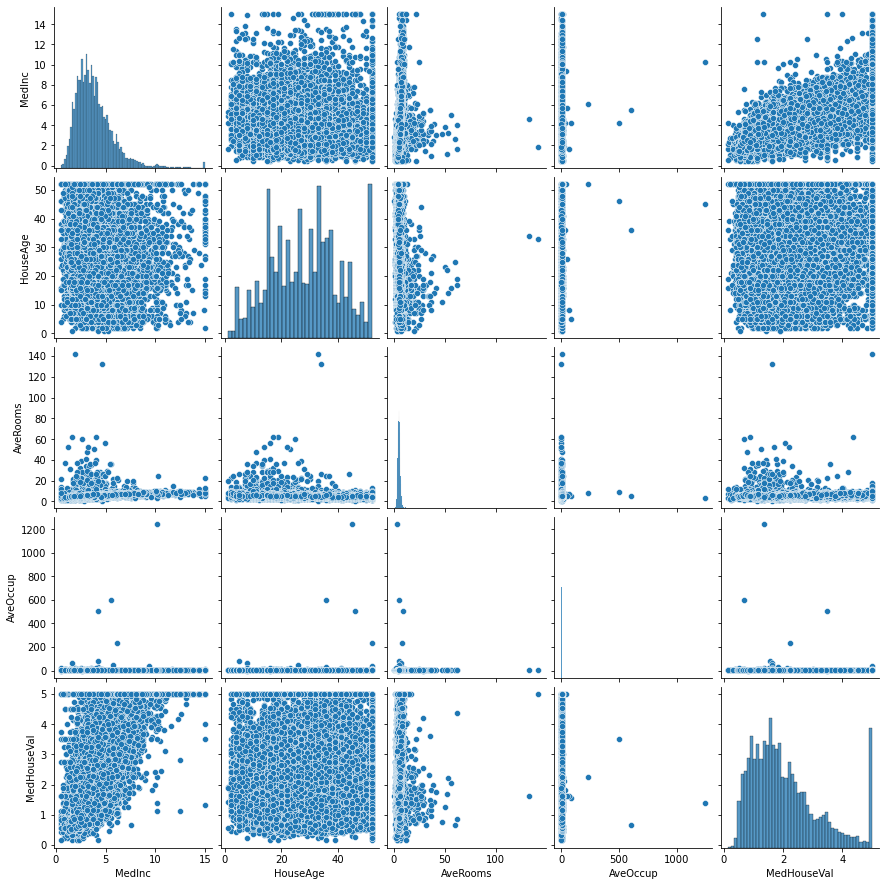

In [197]:
sns.pairplot(df_calif_houses_new[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])

<AxesSubplot:>

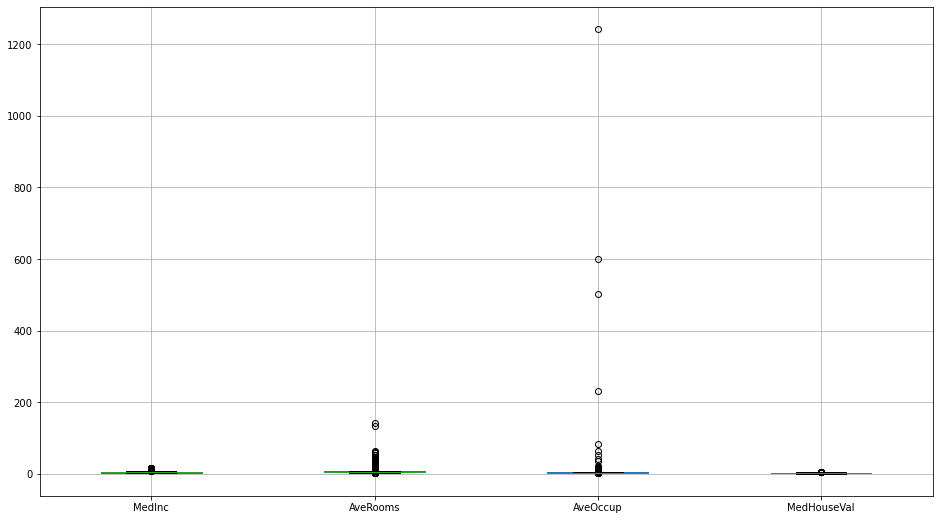

In [198]:
df_calif_houses_new[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal']].plot(kind='box', figsize=(16, 9), grid=True)

In [199]:
df_calif_houses_clean = df_calif_houses_new
for column in df_calif_houses_new.columns:
    q1 = df_calif_houses_clean[column].quantile(0.25)
    q3 = df_calif_houses_clean[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    df_calif_houses_clean = df_calif_houses_clean[df_calif_houses_clean[column] < upper_bound]

In [200]:
df_calif_houses_clean

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1157.0,1.788253,37.84,-122.25,2.414
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot:>

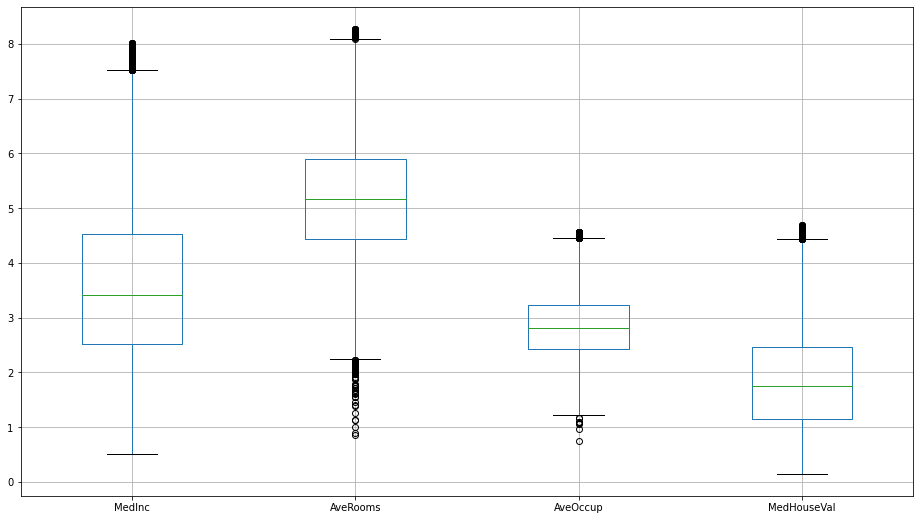

In [201]:
df_calif_houses_clean[['MedInc', 'AveRooms', 'AveOccup', 'MedHouseVal']].plot(kind='box', figsize=(16, 9), grid=True)

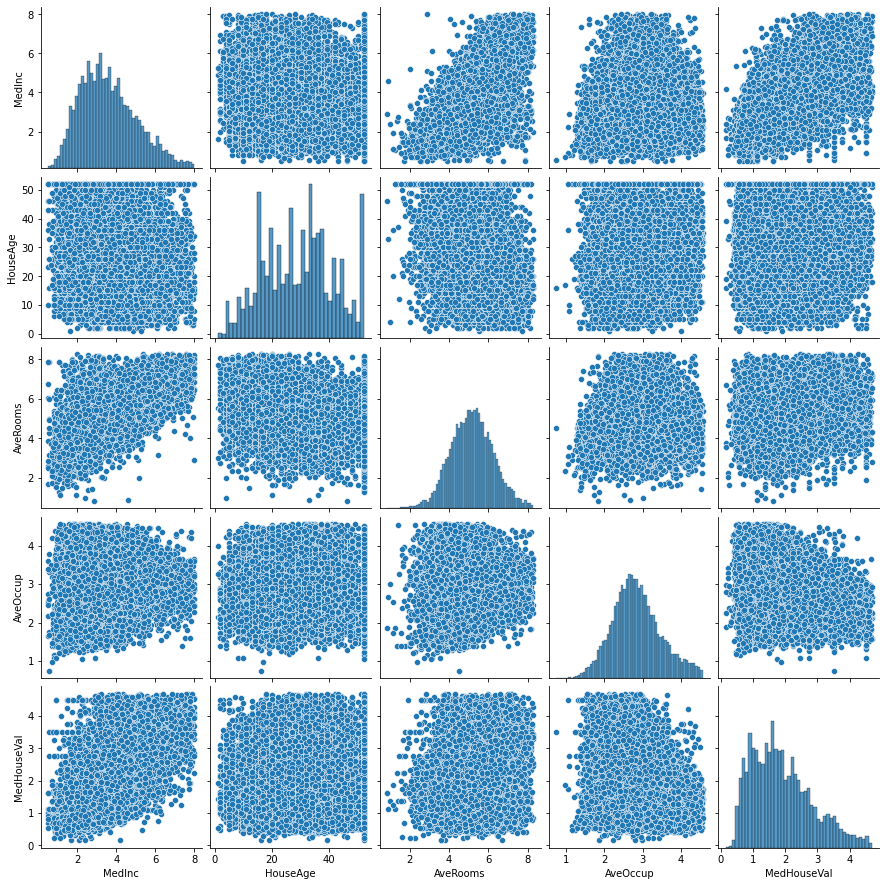

In [202]:
sns.pairplot(df_calif_houses_clean[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'MedHouseVal']])

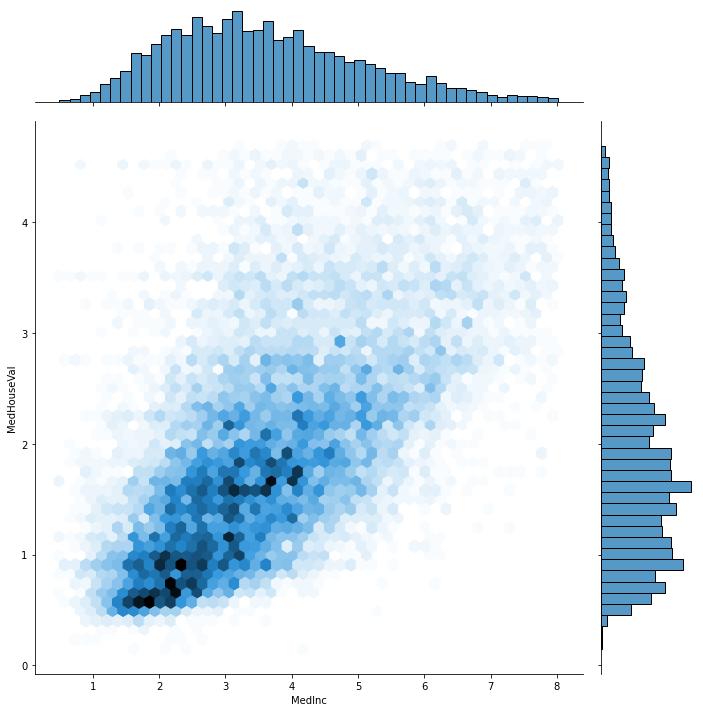

In [203]:
sns.jointplot(x='MedInc', y='MedHouseVal', data=df_calif_houses_clean, kind='hex', height=10)

<AxesSubplot:>

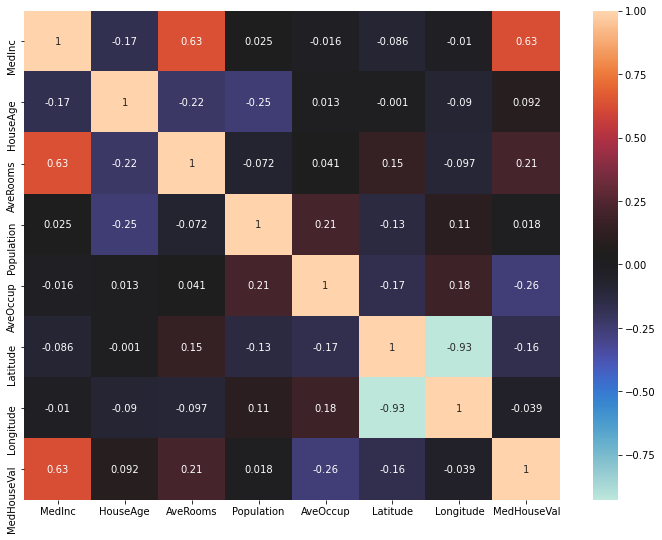

In [36]:
plt.figure(figsize=(12, 9))
sns.heatmap(df_calif_houses_clean.corr(), annot=True, cmap='icefire')

In [204]:
X = df_calif_houses_clean[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_calif_houses_clean['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [205]:
y_pred = model.predict(X_test)

In [206]:
RMSE_3 = mean_squared_error(y_test, y_pred, squared=False)
print(RMSE_3)

0.5684546481525956


In [207]:
R2_3 = r2_score(y_test, y_pred)
print(R2_3)

0.6287082375807207


После отчистки данных, показатели улучшились, особенно RMSE, но незначительно.

In [208]:
df_calif_houses_clean_m = df_calif_houses_clean

In [209]:
df_calif_houses_clean_m['AveRoomsSqrt'] = df_calif_houses_clean.apply(lambda x: x['AveRooms'] ** 2, axis=1)
df_calif_houses_clean_m['MedIncSqRoot'] = df_calif_houses_clean.apply(lambda x: x['MedInc'] ** (1/2), axis=1)
df_calif_houses_clean_m['AveOccupLog'] = df_calif_houses_clean.apply(lambda x: np.log(x['AveOccup']), axis=1)

In [210]:
df_calif_houses_clean_m.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,AveRoomsSqrt,MedIncSqRoot,AveOccupLog
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413,33.841580,2.375521,0.935287
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422,39.461681,1.961173,0.779998
5,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697,22.673387,2.009179,0.760757
6,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992,24.323703,1.912877,0.755373
7,3.1200,52.0,4.797527,1157.0,1.788253,37.84,-122.25,2.414,23.016266,1.766352,0.581239


In [211]:
X = df_calif_houses_clean_m[['MedIncSqRoot', 'HouseAge', 'AveRoomsSqrt', 'Population', 'AveOccupLog', 'Latitude', 'Longitude']]
y = df_calif_houses_clean_m['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [212]:
y_pred = model.predict(X_test)

In [213]:
RMSE_4 = mean_squared_error(y_test, y_pred, squared=False)
RMSE_4

0.5786427047346561

In [214]:
R2_4 = r2_score(y_test, y_pred)
R2_4

0.6152801150402545

При математической обработки ряда признаков, модель показала небольшое ухудшение метрик. Скорее всего в данных отсутсвуют какие либо нелинейные зависимсости, либо они арпксимируют хуже линейных.

In [215]:
from sklearn.cluster import DBSCAN, KMeans

In [216]:
kmeans = KMeans(n_clusters=10)
cluster = kmeans.fit_predict(df_calif_houses_clean_m[['Latitude', 'Longitude']])
df_calif_houses_clean_m['cluster'] = cluster
df_calif_houses_clean_m = pd.get_dummies(df_calif_houses_clean_m, columns=['cluster'])
df_calif_houses_clean_m.head()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal,AveRoomsSqrt,MedIncSqRoot,...,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
3,5.6431,52.0,5.817352,558.0,2.547945,37.85,-122.25,3.413,33.841580,2.375521,...,0,0,0,0,0,0,0,0,0,1
4,3.8462,52.0,6.281853,565.0,2.181467,37.85,-122.25,3.422,39.461681,1.961173,...,0,0,0,0,0,0,0,0,0,1
5,4.0368,52.0,4.761658,413.0,2.139896,37.85,-122.25,2.697,22.673387,2.009179,...,0,0,0,0,0,0,0,0,0,1
6,3.6591,52.0,4.931907,1094.0,2.128405,37.84,-122.25,2.992,24.323703,1.912877,...,0,0,0,0,0,0,0,0,0,1
7,3.1200,52.0,4.797527,1157.0,1.788253,37.84,-122.25,2.414,23.016266,1.766352,...,0,0,0,0,0,0,0,0,0,1


In [217]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [218]:
df_calif_houses_clean_m.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude',
       'Longitude', 'MedHouseVal', 'AveRoomsSqrt', 'MedIncSqRoot',
       'AveOccupLog', 'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3',
       'cluster_4', 'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8',
       'cluster_9'],
      dtype='object')

In [223]:
X = df_calif_houses_clean_m[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude',
                          'cluster_0', 'cluster_1', 'cluster_2', 'cluster_3', 'cluster_4',
       'cluster_5', 'cluster_6', 'cluster_7', 'cluster_8', 'cluster_9']]
y = df_calif_houses_clean_m['MedHouseVal']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = make_pipeline(PolynomialFeatures(3),LinearRegression(normalize=False))
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [224]:
y_pred = model.predict(X_test)

In [225]:
RMSE_5 = mean_squared_error(y_test, y_pred, squared=False)
RMSE_5

0.45660524803538155

In [226]:
R2_5 = r2_score(y_test, y_pred)
R2_5

0.7604448744192636

При полиноминальных признаках, показатели модели серьёзно улучшаются. Добавление геграфических кластеров и их OneHot кодировании, также происходит улчшение метрик, правда меньше чем при полиноме. Z масшатбирование вроде как чуть чуть улчшает ситуацию, но улучшение в рамках погрешности.

In [238]:
print('Модель', 'RMSE', 'R2', 'Признаки', 'Преобразования датасета', sep='|')
print('Model 1', RMSE_1, R2_1, ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                                'AveOccup', 'Latitude', 'Longitude'], 'Все признаки, без изменений', sep='|')
print('Model 2', RMSE_2, R2_2, ['MedInc', 'HouseAge', 'AveRooms', 'Population',
                                'AveOccup', 'Latitude', 'Longitude'], 'Признаки по корреляции', sep='|')
print('Model 3', RMSE_3, R2_3, ['MedInc', 'HouseAge', 'AveRooms', 'Population',
                                'AveOccup', 'Latitude', 'Longitude'], 'Почищенно от выбросов', sep='|')
print('Model 4', RMSE_4, R2_4, ['MedIncSqRoot', 'HouseAge', 'AveRoomsSqrt', 'Population',
                                'AveOccupLog', 'Latitude', 'Longitude'], 'Ряд признаков заменнны на их корни, квадраты и лограифмы', sep='|')
print('Model 5', RMSE_5, R2_5, ['MedInc', 'HouseAge', 'AveRooms', 'Population',
                                'AveOccup', 'Latitude', 'Longitude', 'claster0_9'],
      'Признаки были преобразованы в полином 3 степени, добавлены геграфические кластеры с помощью модели Kmeans, закодированны OneHot, Z массшатбирование', sep='|')


Модель|RMSE|R2|Признаки|Преобразования датасета
Model 1|0.7455813830127762|0.575787706032451|['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']|Все признаки, без изменений
Model 2|0.7398151789804084|0.5823239094526445|['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']|Признаки по корреляции
Model 3|0.5684546481525956|0.6287082375807207|['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude']|Почищенно от выбросов
Model 4|0.5786427047346561|0.6152801150402545|['MedIncSqRoot', 'HouseAge', 'AveRoomsSqrt', 'Population', 'AveOccupLog', 'Latitude', 'Longitude']|Ряд признаков заменнны на их корни, квадраты и лограифмы
Model 5|0.45660524803538155|0.7604448744192636|['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'claster0_9']|Признаки были преобразованы в полином 3 степени, добавлены геграфические кластеры с помощью модели Kmeans, закодированны O

Во-первых, следует сказать, что данные надо обязательно исследовать и чистить, если нужно, потому что это сильно влияет на работу модели. Что касается датасета, то зависимость в нём лучше всего описывается полиномом 3 степени, услиении роли географических класетров. Изменения призноаков, на логарифмы, корни и квадраты, в данном случае особо ничего не дало. Итоговая модель имеет сравнительно неплохие характеристики, но среднюю ошибку хотелось бы меньшую. Коэффициент детерминации довольно неплохой, близок к 1. Это говорит о том, что модель работает лучше чем простое подставление среднего.